Tertiary enrollment trends show us a glimpse into a country’s ability to build a skilled workforce, support innovation, and grow a diverse economy. While primary and secondary education lay the groundwork, higher education plays a key role in long-term development. Comparing enrollment rates in Afghanistan (LDC), India (MDC), and Japan (DC) shows how access to higher education changes with economic growth and shifting national goals. These patterns also reveal gaps in educational access and reflect how much countries invest in advanced training and research.

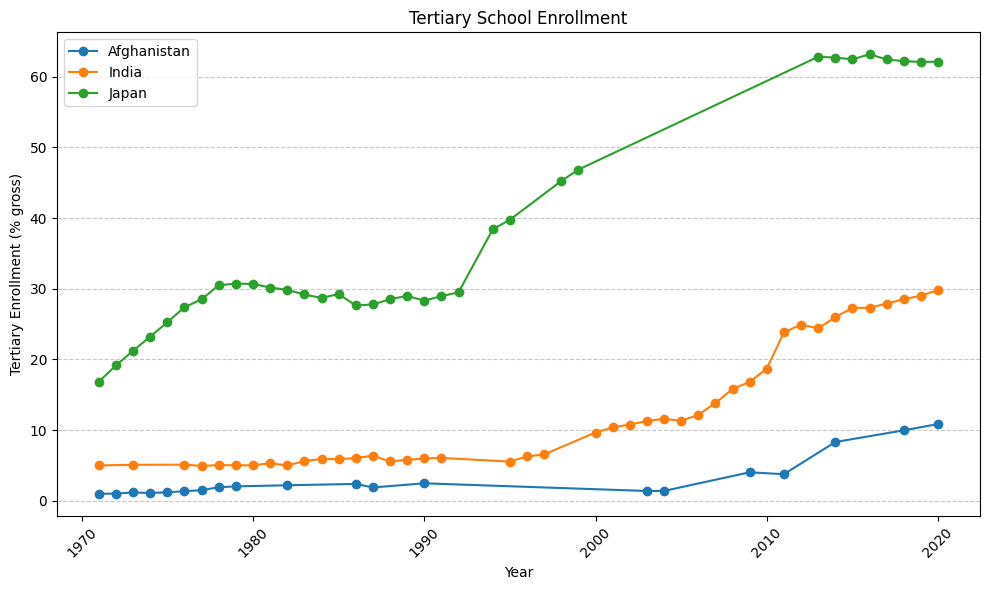

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load each country’s data
japan_df = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/japan_enrollment.csv")
india_df = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/india_enrollment.csv")
afg_df   = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/afghanistan_enrollment.csv")

# 2. Tag with country names
japan_df["Country"] = "Japan"
india_df["Country"] = "India"
afg_df["Country"]   = "Afghanistan"

# 3. Combine into one DataFrame
df = pd.concat([japan_df, india_df, afg_df], ignore_index=True)

# 4. Keep only the tertiary columng
tertiary = df[["Country", "Year", "Tertiary Enrollment"]].copy()
tertiary.rename(columns={"Tertiary Enrollment": "Enrollment"}, inplace=True)

# 5. Clean the data
tertiary["Year"] = tertiary["Year"].astype(str).str.extract(r"(\d+)").astype(int)
tertiary = tertiary.dropna(subset=["Enrollment"]) # Drop rows with missing tertiary enrollment


plt.figure(figsize=(10, 6))

for country, group in tertiary.groupby("Country"):
    group_sorted = group.sort_values("Year") # Ensure data is sorted by year for line plot
    plt.plot(group_sorted.Year, group_sorted.Enrollment, marker="o", label=country)

plt.title("Tertiary School Enrollment")
plt.xlabel("Year")
plt.ylabel("Tertiary Enrollment (% gross)")
plt.xticks(rotation=45)
plt.legend() 
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

Tertiary enrollment trends vary sharply between the three countries. Japan maintains the highest tertiary enrollment rates throughout the period, reflecting widespread access to higher education. India shows steady growth, particularly post-2000, suggesting rising university participation as economic development progressed. Afghanistan’s enrollment rates remain low with significant gaps, underscoring ongoing barriers to higher education access.

The table below shows the gap between primary and tertiary enrollment rates from 2000 onward. Across all three countries, tertiary enrollment rates lag significantly behind primary education. Afghanistan exhibits the largest gaps, reflecting major barriers to higher education access. In contrast, Japan shows much smaller gaps, though even there, tertiary enrollment remains meaningfully lower than primary enrollment. India displays a gradual narrowing of the gap over time, suggesting growing participation in higher education.

In [ ]:
import pandas as pd

# Load all three datasets
japan = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/japan_enrollment.csv")
india = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/india_enrollment.csv")
afg   = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/afghanistan_enrollment.csv")

# Add country labels
japan["Country"] = "Japan"
india["Country"] = "India"
afg["Country"]   = "Afghanistan"

df = pd.concat([japan, india, afg], ignore_index=True)

df["Year"] = df["Year"].astype(str).str.extract(r"(\d+)").astype(int)

df = df[["Country", "Year", "Primary Enrollment", "Secondary Enrollment", "Tertiary Enrollment"]]

df["Primary_Tertiary_Gap"] = df["Primary Enrollment"] - df["Tertiary Enrollment"]

df["Primary_Tertiary_Gap"] = df["Primary_Tertiary_Gap"].round(2)

df_recent = df[df["Year"] >= 2000][["Country", "Year", "Primary_Tertiary_Gap"]]
df_recent.head(10)


,Country,Year,Primary_Tertiary_Gap
29,Japan,2013,39.42
30,Japan,2014,39.69
31,Japan,2015,39.95
32,Japan,2016,39.03
33,Japan,2017,39.79
34,Japan,2018,39.89
35,Japan,2019,40.53
36,Japan,2020,40.60
66,India,2000,84.35
67,India,2001,88.60
